In [1]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade librosa

In [3]:
#Importing necessary libraries

import numpy as np
import pandas as pd

import seaborn as sns
import math

import os
import librosa as lb 

import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats

In [4]:
# Load the Diagnosis .csv file 
Diagnosis = pd.read_csv(r"C:\Users\22rup\OneDrive\Desktop\FINAL PROJECT\archive (1)\Respiratory_Sound_Database\Respiratory_Sound_Database\patient_diagnosis.csv",names=['PId', 'Diagnosis'])
Diagnosis

,PId,Diagnosis
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,URTI
...,...,...
121,222,COPD
122,223,COPD
123,224,Healthy
124,225,Healthy


In [5]:
#Display the unique diagnosis labels for 'Diagnosis' columns
diag = Diagnosis['Diagnosis'].unique()
diag

array(['URTI', 'Healthy', 'Asthma', 'COPD', 'LRTI', 'Bronchiectasis',
       'Pneumonia', 'Bronchiolitis'], dtype=object)

In [6]:
#Count the number of times each unique diagnosis appears in 'Diagnosis' column 
Diagnosis['Diagnosis'].value_counts()

COPD              64
Healthy           26
URTI              14
Bronchiectasis     7
Pneumonia          6
Bronchiolitis      6
LRTI               2
Asthma             1
Name: Diagnosis, dtype: int64

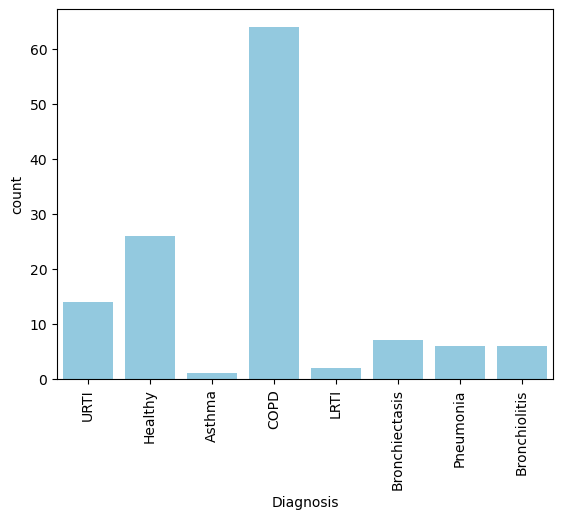

In [7]:
#Plot the 'Diagnosis' column
sns.countplot(data=Diagnosis, x='Diagnosis', color='skyblue')
plt.xticks(rotation=90) 
plt.show()

In [8]:
#Split the file names at the period
#Create a list of file names for those files that have a ".txt" extension 
path=r"C:\Users\22rup\OneDrive\Desktop\FINAL PROJECT\archive (1)\Respiratory_Sound_Database\Respiratory_Sound_Database\audio_and_txt_files"
files=[s.split('.')[0] for s in os.listdir(path) if '.txt' in s]

In [9]:
#Data is the original signal
#Add random noise to the data 
def add_noise(data, x):                      #x controls the amount of noise to add 
    noise = np.random.randn(len(data))       #Genrate random noise with same length of data
    data_noise = data + x * noise            #Add the scaled noise to original data
    return data_noise                        #Return the noisy signal


#Shift the data with number of samples #Moving forward or backward
def shift(data, x):                          #x is the number of positions to shift the data
    return np.roll(data, x)                  #Shift data with x samples and return the signal
 
    
#Stretch or compress the data in time   # speeding up or down  
def stretch(data, rate):                     #rate is the stretching factor(rate>1 stretches, rate<1 compresses)
    data_stretched = lb.effects.time_stretch(data, rate=rate) #apply time stretching to the data
    return data_stretched                    #return stretched signal


#shift the pitch of the data without changing its duration #altering frequency
def pitch_shift(data, rate):                 #rate is the number of steps to shift the pitch
    data_pitch_shifted = lb.effects.pitch_shift(data, sr=22050, n_steps=rate) # apply pitch shifting to the data
    return data_pitch_shifted                #return pitch shifted signal

In [10]:
import librosa as lb
#Visualize original audio signal and augmented versions of it
def show_audio(audio_path):
    y, sr = lb.load(audio_path)
    #Data augmentation
    y_noise = add_noise(y, 0.0007)                # add small amount of noise
    y_shift = shift(y, 3000)                      #shift signal by 3000
    y_stretch_1 = stretch(y, 1.2)                 #stretch the signal speeding up
    y_stretch_2 = stretch(y, 0.8)                 #compress the signal speeding down
    y_pitch_shift = pitch_shift(y, 3)             #shift the pitch by 3 semitones
    
    plt.figure(figsize=(20, 8))
    
    #Plot original signal
    plt.subplot(3, 2, 1)
    lb.display.waveshow(y, sr=sr)
    plt.title('Original')

    #plot the signal with added noise
    plt.subplot(3, 2, 2)
    lb.display.waveshow(y_noise, sr=sr)
    plt.title('Noise')
    
    #plot the shifted signal
    plt.subplot(3, 2, 3)
    lb.display.waveshow(y_shift, sr=sr)
    plt.title('Shift')
    
    #plot the stretched signal rate>1
    plt.subplot(3, 2, 4)
    lb.display.waveshow(y_stretch_1, sr=sr)
    plt.title('Stretch 1')
    
    #plot the stretched signal rate<1
    plt.subplot(3, 2, 5)
    lb.display.waveshow(y_stretch_2, sr=sr)
    plt.title('Stretch 2')
    
    #Plot the pitch-shifted signal
    plt.subplot(3, 2, 6)
    lb.display.waveshow(y_pitch_shift, sr=sr)
    plt.title('Pitch Shift')

    #adjust the layout to prevent overlap
    plt.tight_layout()

In [11]:
#Visualize MFCC feature of original and augmented data
def show_audio_features(audio_path):
    y, sr = lb.load(audio_path)
    #Data augmentation
    y_noise = add_noise(y , 0.0007)                        # add small amount of noise
    y_shift = shift(y,3000)                                #shift signal by 3000
    y_stretch_1 = stretch(y, 1.2)                          #stretch the signal speeding up
    y_stretch_2 = stretch(y, 0.8)                          #compress the signal speeding down
    y_pitch_shift = pitch_shift(y, 3)                      #shift the pitch by 3 semitones       
     
    #Compute MFCC for each version of audio file
    y = lb.feature.mfcc(y=y, sr=sr, n_mfcc=50)
    y_noise = lb.feature.mfcc(y=y_noise, sr=sr, n_mfcc=50)
    y_shift = lb.feature.mfcc(y=y_shift, sr=sr, n_mfcc=50)
    y_stretch_1 = lb.feature.mfcc(y=y_stretch_1, sr=sr, n_mfcc=50)
    y_stretch_2 = lb.feature.mfcc(y=y_stretch_2, sr=sr, n_mfcc=50)
    y_pitch_shift = lb.feature.mfcc(y=y_pitch_shift, sr=sr, n_mfcc=50)
    
    plt.figure(figsize=(20, 8))
    
    #Plot the MFCCs of the original audio
    plt.subplot(3,2,1)
    lb.display.specshow(lb.power_to_db(y,ref=np.max),
                             y_axis='mel',
                             fmax=8000,
                             x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Original')

    #Plot the MFCCs of the noisy audio
    plt.subplot(3,2,2)
    lb.display.specshow(lb.power_to_db(y_noise,ref=np.max),
                             y_axis='mel',
                             fmax=8000,
                             x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Noise')

    #Plot the MFCCs of the shifted audio
    plt.subplot(3,2,3)
    lb.display.specshow(lb.power_to_db(y_shift,ref=np.max),
                             y_axis='mel',
                             fmax=8000,
                             x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Shift')
    
    #Plot the MFCCs of the time-stretched(rate>1) audio
    plt.subplot(3,2,4)
    lb.display.specshow(lb.power_to_db(y_stretch_1,ref=np.max),
                             y_axis='mel',
                             fmax=8000,
                             x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Stretch 1')
    
    #Plot the MFCCs of the time-compressed(rate<1) audio
    plt.subplot(3,2,5)
    lb.display.specshow(lb.power_to_db(y_stretch_2,ref=np.max),
                             y_axis='mel',
                             fmax=8000,
                             x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Stretch 2')
    
    #Plot the MFCCs of the pitch-shifted audio
    plt.subplot(3,2,6)
    lb.display.specshow(lb.power_to_db(y_pitch_shift,ref=np.max),
                             y_axis='mel',
                             fmax=8000,
                             x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Pitch Shift')
    
    
    #adjust the layout to prevent overlap
    plt.tight_layout()

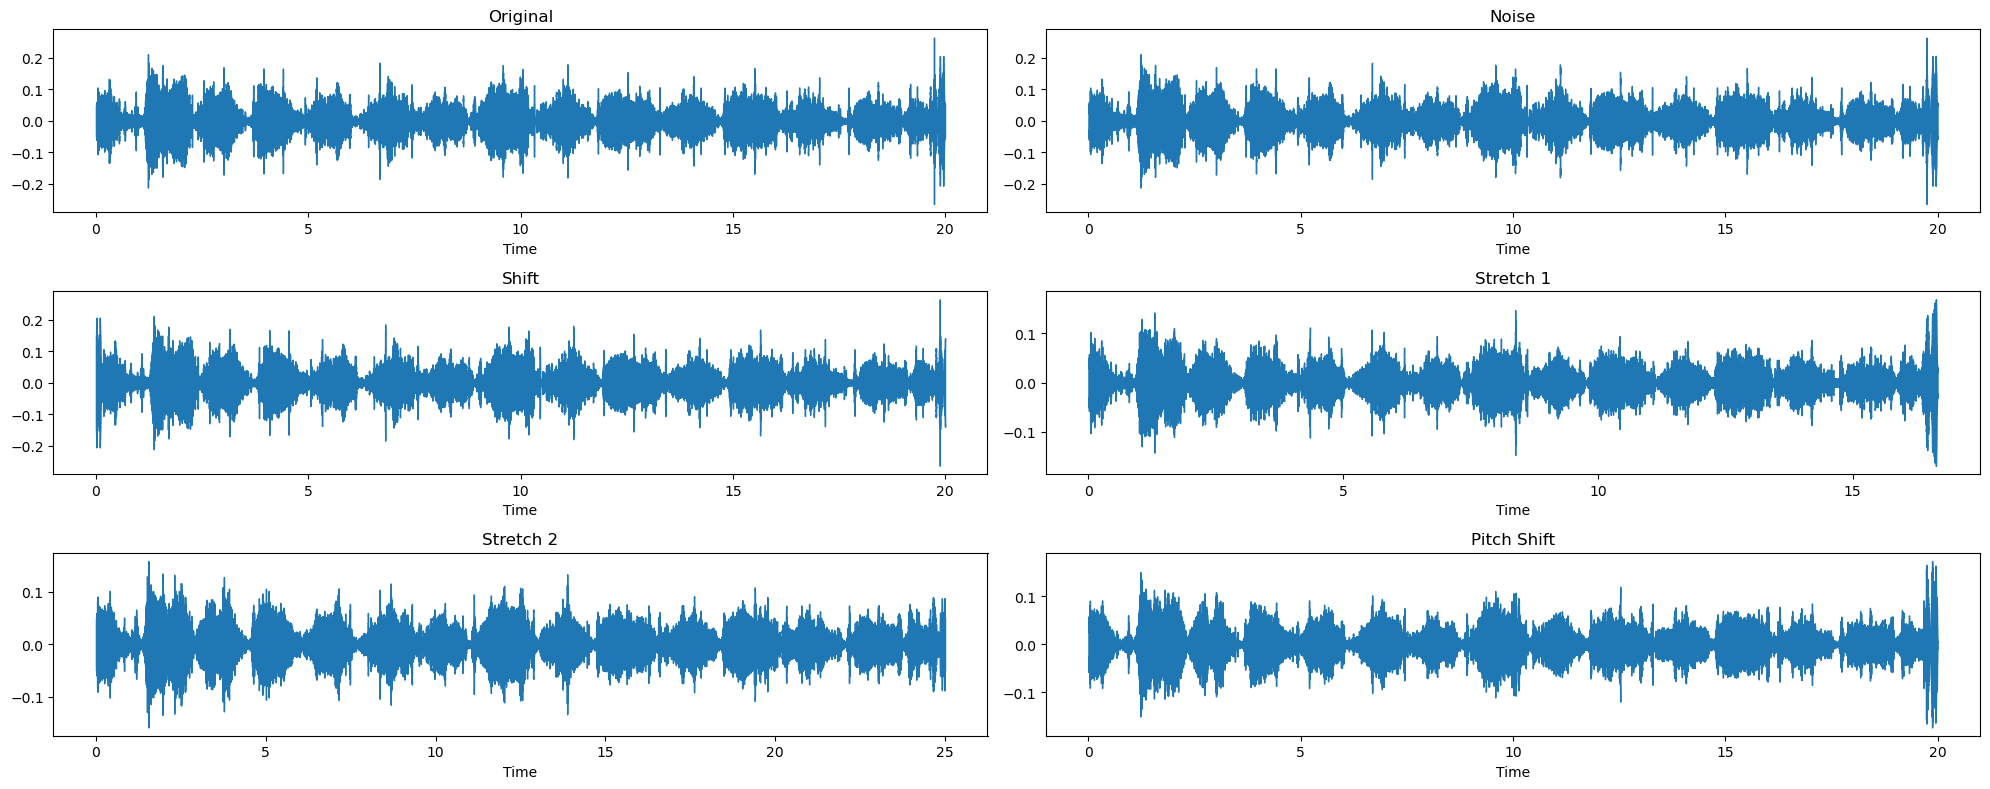

In [12]:
#Visualize the original audio signal and various augmented versions for a specific audio file
show_audio(r"C:\Users\22rup\OneDrive\Desktop\FINAL PROJECT\archive (1)\Respiratory_Sound_Database\Respiratory_Sound_Database\audio_and_txt_files\105_1b1_Tc_sc_Meditron.wav")

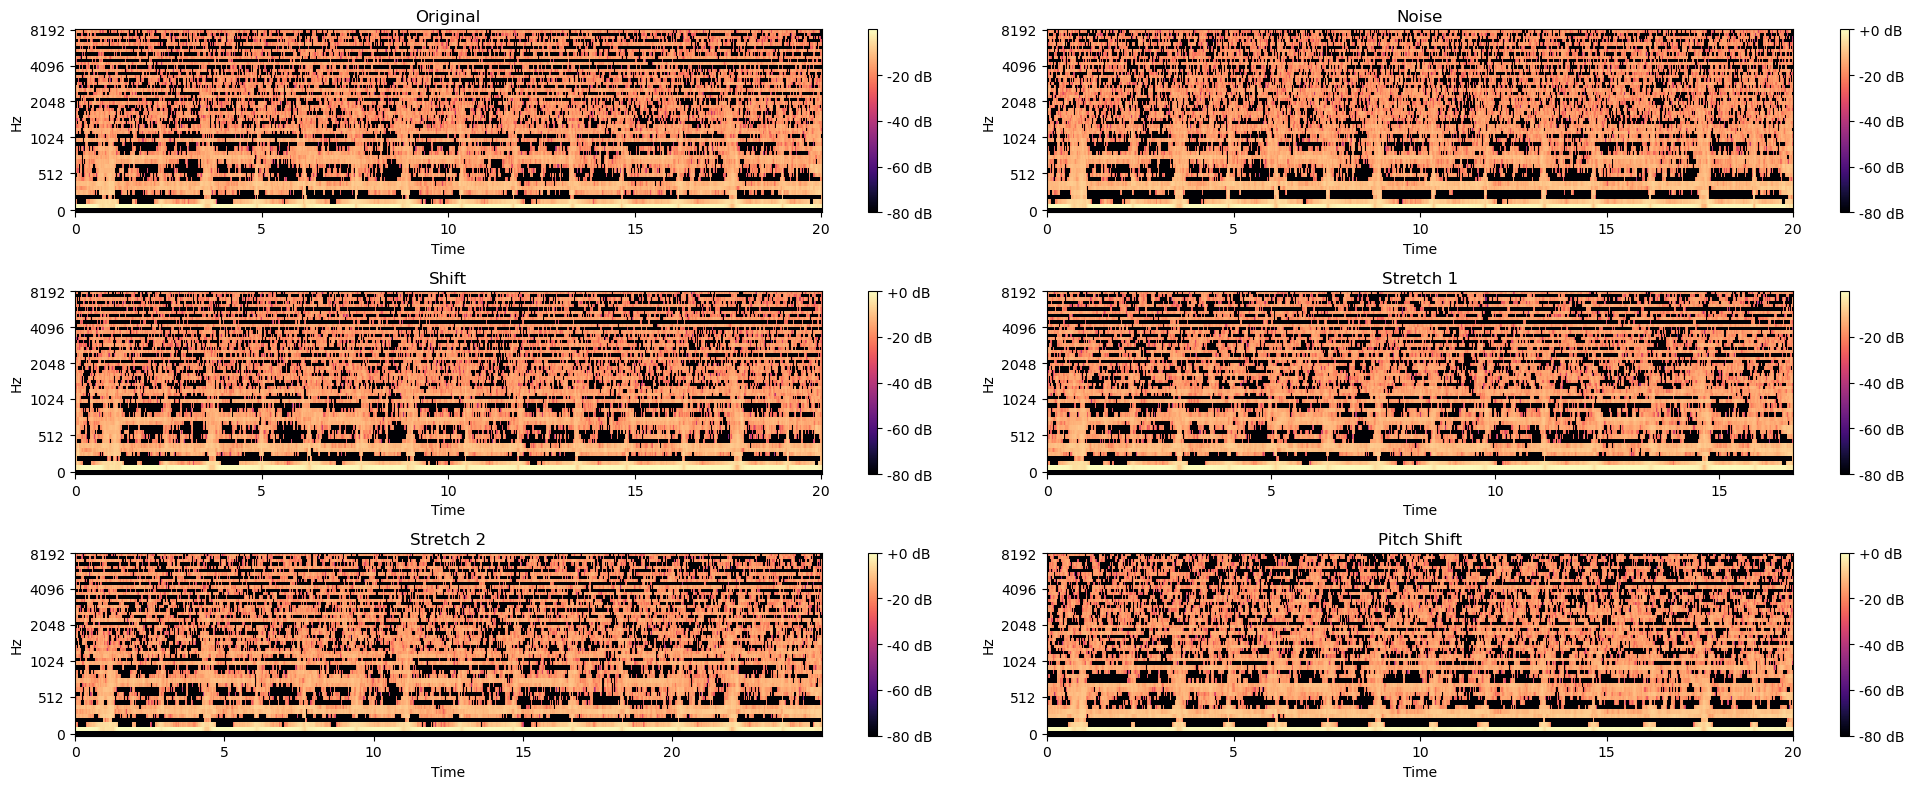

In [13]:
#Visualize MFCC feature of original and augmented data
show_audio_features(r"C:\Users\22rup\OneDrive\Desktop\FINAL PROJECT\archive (1)\Respiratory_Sound_Database\Respiratory_Sound_Database\audio_and_txt_files\105_1b1_Tc_sc_Meditron.wav")

In [14]:
def mfccs_feature_extraction(dir_):

#Initialize empty lists
    X_ = []
    y_ = []
    
#specific logic for handling COPD files
    COPD = []
    copd_count = 0

    data = Diagnosis  #Load diagnosis data
    features = 52    
    
    #iterate over each file in the given directory
    for soundDir in os.listdir(dir_):
        # Process only '.wav' files and exclude specific patient IDs ('103', '108', '115')
        if soundDir[-3:] == 'wav' and soundDir[:3] not in ['103', '108', '115']:
            #Get the diagnosis for the patients based on the patient id
            p = list(data[data['PId'] == int(soundDir[:3])]['Diagnosis'])[0]
            
            #Process files with a COPD diagnosis
            if p == 'COPD':
                if (soundDir[:6] in COPD) and copd_count < 2:
                    data_x, sampling_rate = lb.load(dir_ + soundDir, res_type='kaiser_fast')
                    mfccs = np.mean(lb.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=features).T, axis=0)
                    COPD.append(soundDir[:6])
                    copd_count += 1
                    X_.append(mfccs)
                    y_.append(list(data[data['PId'] == int(soundDir[:3])]['Diagnosis'])[0])
                    
                #If the patient's data has not been encountered, reset the COPD count and process the file    
                if soundDir[:6] not in COPD:
                    data_x, sampling_rate = lb.load(dir_ + soundDir, res_type='kaiser_fast')
                    mfccs = np.mean(lb.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=features).T, axis=0)
                    COPD.append(soundDir[:6])
                    copd_count = 0
                    X_.append(mfccs)
                    y_.append(list(data[data['PId'] == int(soundDir[:3])]['Diagnosis'])[0])
            
            #process files with non COPD diagnoses
            if p != 'COPD':
                if (p == 'Bronchiectasis') or (p == 'Bronchiolitis'):
                    data_x, sampling_rate = lb.load(dir_ + soundDir, res_type='kaiser_fast')
                    mfccs = np.mean(lb.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=features).T, axis=0)
                    X_.append(mfccs)
                    y_.append('Bronchiolitis')
                    
                    #apply noise and extract features
                    data_noise = add_noise(data_x, 0.001)
                    mfccs_noise = np.mean(lb.feature.mfcc(y=data_noise, sr=sampling_rate, n_mfcc=features).T, axis=0)
                    X_.append(mfccs_noise)
                    y_.append('Bronchiolitis')

                    #apply time shift and extract features
                    data_shift = shift(data_x, 1600)
                    mfccs_shift = np.mean(lb.feature.mfcc(y=data_shift, sr=sampling_rate, n_mfcc=features).T, axis=0)
                    X_.append(mfccs_shift)
                    y_.append('Bronchiolitis')
                    
                    #apply time stretch (speed up) and extract features
                    data_stretch = stretch(data_x, 1.2)
                    mfccs_stretch = np.mean(lb.feature.mfcc(y=data_stretch, sr=sampling_rate, n_mfcc=features).T, axis=0)
                    X_.append(mfccs_stretch)
                    y_.append('Bronchiolitis')
                    
                    #apply time stretch (speed down) and extract features
                    data_stretch_2 = stretch(data_x, 0.8)
                    mfccs_stretch_2 = np.mean(lb.feature.mfcc(y=data_stretch_2, sr=sampling_rate, n_mfcc=features).T, axis=0)
                    X_.append(mfccs_stretch_2)
                    y_.append('Bronchiolitis')
                    
                    #Apply pitch shift and extract MFCC features
                    data_pitch_shift = pitch_shift(data_x, 3)
                    mfccs_pitch_shift = np.mean(lb.feature.mfcc(y=data_pitch_shift, sr=sampling_rate, n_mfcc=features).T, axis=0)
                    X_.append(mfccs_pitch_shift)
                    y_.append('Bronchiolitis')
                    
                 #For other diagnoses, apply similar augmentation and extraction as above but with the original label    
                else: 
                    data_x, sampling_rate = lb.load(dir_ + soundDir, res_type='kaiser_fast')
                    mfccs = np.mean(lb.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=features).T, axis=0)
                    X_.append(mfccs)
                    y_.append(list(data[data['PId'] == int(soundDir[:3])]['Diagnosis'])[0])
                    
                    data_noise = add_noise(data_x, 0.001)
                    mfccs_noise = np.mean(lb.feature.mfcc(y=data_noise, sr=sampling_rate, n_mfcc=features).T, axis=0)
                    X_.append(mfccs_noise)
                    y_.append(p)

                    data_shift = shift(data_x, 1600)
                    mfccs_shift = np.mean(lb.feature.mfcc(y=data_shift, sr=sampling_rate, n_mfcc=features).T, axis=0)
                    X_.append(mfccs_shift)
                    y_.append(p)
                    
                    data_stretch = stretch(data_x, 1.2)
                    mfccs_stretch = np.mean(lb.feature.mfcc(y=data_stretch, sr=sampling_rate, n_mfcc=features).T, axis=0)
                    X_.append(mfccs_stretch)
                    y_.append(p)
                    
                    data_stretch_2 = stretch(data_x, 0.8)
                    mfccs_stretch_2 = np.mean(lb.feature.mfcc(y=data_stretch_2, sr=sampling_rate, n_mfcc=features).T, axis=0)
                    X_.append(mfccs_stretch_2)
                    y_.append(p)
                    
                    data_pitch_shift = pitch_shift(data_x, 3)
                    mfccs_pitch_shift = np.mean(lb.feature.mfcc(y=data_pitch_shift, sr=sampling_rate, n_mfcc=features).T, axis=0)
                    X_.append(mfccs_pitch_shift)
                    y_.append(p)
    
    #Convert the feature and label lists to NumPy arrays
    X_data = np.array(X_)
    y_data = np.array(y_)
    
    return X_data, y_data 


In [16]:
#Extract MFCC features from all the audio files in the specified directory
x_mfccs, y = mfccs_feature_extraction(r"C:\Users\22rup\OneDrive\Desktop\FINAL PROJECT\archive (1)\Respiratory_Sound_Database\Respiratory_Sound_Database\audio_and_txt_files\\")

In [17]:
x_mfccs

array([[-528.4309082 ,  104.52567291,   69.89893341, ...,    1.3779093 ,
           1.00682986,    0.87130207],
       [-429.43654296,   56.13999452,   48.95573273, ...,    0.93684644,
           0.82226157,    1.25375205],
       [-529.82897949,  105.58005524,   70.15711212, ...,    1.36810017,
           0.99015296,    0.86666781],
       ...,
       [-540.15545654,   78.8822403 ,   58.73851013, ...,    1.67542732,
           1.5360738 ,    1.44291854],
       [-536.74743652,   76.06425476,   57.63049698, ...,    1.69908977,
           1.60868633,    1.54039741],
       [-527.45074463,   82.99169922,   61.9855423 , ...,    1.58586824,
           1.62284446,    1.63761973]])

In [18]:
def augmented_lables_count(lables):
    #numpy's unique function to find the unique labels and their corresponding counts
    #'unique' will hold the unique labels, and 'counts' will hold the number of occurrences for each label
    unique, counts = np.unique(lables, return_counts=True)
    data_count = dict(zip(unique, counts))

    data = data_count

    #Extract the list of diseases and their respective counts
    courses = list(data.keys())
    values = list(data.values())

    #Create a bar plot to visualize the distribution of the diseases
    fig = plt.figure(figsize = (10, 5))

    plt.bar(courses, values, color =['green','orange','red','yellow','black','blue'],
            width = 0.4)

    plt.xlabel("Diseases")
    plt.ylabel("Count")
    plt.title("Count of each disease")
    plt.show()

    print (data_count)

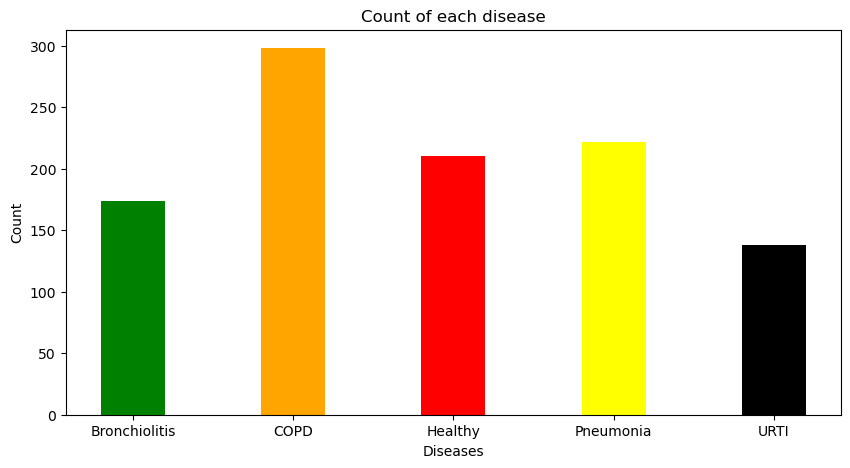

{'Bronchiolitis': 174, 'COPD': 298, 'Healthy': 210, 'Pneumonia': 222, 'URTI': 138}


In [19]:
augmented_lables_count(y)

In [20]:
#Reshape the label array 'y' to a column vector with shape (n_samples, 1)
y_data_encode = y.reshape(y.shape[0],1)

#Apply one-hot encoding for 'COPD' by replacing any occurrence of 'COPD' with the vector [1, 0, 0, 0, 0]
y_data_encode = np.where(y_data_encode == 'COPD',np.array([1,0,0,0,0]).reshape(1,5) , y_data_encode)

#Apply one-hot encoding for 'Bronchiolitis' by replacing any occurrence of 'Bronchiolitis' with the vector [0, 1, 0, 0, 0]
y_data_encode = np.where(y_data_encode == 'Bronchiolitis',np.array([0,1,0,0,0]).reshape(1,5) , y_data_encode)

#Apply one-hot encoding for 'Pneumonia' by replacing any occurrence of 'Pneumonia' with the vector [0, 0, 1, 0, 0]
y_data_encode = np.where(y_data_encode == 'Pneumonia',np.array([0,0,1,0,0]).reshape(1,5) , y_data_encode)

#Apply one-hot encoding for 'URTI' by replacing any occurrence of 'URTI' with the vector [0, 0, 0, 1, 0]
y_data_encode = np.where(y_data_encode == 'URTI',np.array([0,0,0,1,0]).reshape(1,5) , y_data_encode)

#Apply one-hot encoding for 'Healthy' by replacing any occurrence of 'Healthy' with the vector [0, 0, 0, 0, 1]
y_data_encode = np.where(y_data_encode == 'Healthy',np.array([0,0,0,0,1]).reshape(1,5) , y_data_encode)

#Convert the encoded labels to a float64 data type for consistency and compatibility with further processing
Y_data = y_data_encode.astype('float64')


In [21]:
#Convert the list of MFCC features into an array
mfccs_features = np.array(x_mfccs)

#Convert the list of one-hot encoded labels into an array.
lables = np.array(Y_data)

mfccs_features.shape , lables.shape

((1042, 52), (1042, 5))

In [22]:
mfccs_features

array([[-528.4309082 ,  104.52567291,   69.89893341, ...,    1.3779093 ,
           1.00682986,    0.87130207],
       [-429.43654296,   56.13999452,   48.95573273, ...,    0.93684644,
           0.82226157,    1.25375205],
       [-529.82897949,  105.58005524,   70.15711212, ...,    1.36810017,
           0.99015296,    0.86666781],
       ...,
       [-540.15545654,   78.8822403 ,   58.73851013, ...,    1.67542732,
           1.5360738 ,    1.44291854],
       [-536.74743652,   76.06425476,   57.63049698, ...,    1.69908977,
           1.60868633,    1.54039741],
       [-527.45074463,   82.99169922,   61.9855423 , ...,    1.58586824,
           1.62284446,    1.63761973]])

In [23]:
from sklearn.model_selection import train_test_split


# First split: Train and Validation sets
mfcc_train, mfcc_val, lables_train, lables_val = train_test_split(
    mfccs_features, lables, test_size=0.175, random_state=10, stratify=lables #82.5% for training
)

# Second split: Train and Test sets
mfcc_train, mfcc_test, lables_train, lables_test = train_test_split(
    mfcc_train, lables_train, test_size=0.075, random_state=10, stratify=lables_train #92.5% for training
)

# Print shapes of the resulting datasets
print(f"mfcc_train shape: {mfcc_train.shape}, mfcc_val shape: {mfcc_val.shape}, mfcc_test shape: {mfcc_test.shape}")
print(f"lables_train shape: {lables_train.shape}, lables_val shape: {lables_val.shape}, lables_test shape: {lables_test.shape}")


mfcc_train shape: (794, 52), mfcc_val shape: (183, 52), mfcc_test shape: (65, 52)
lables_train shape: (794, 5), lables_val shape: (183, 5), lables_test shape: (65, 5)


In [25]:
pip install --upgrade tensorflow

In [26]:
print(mfccs_features.shape)

(1042, 52)


In [27]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.layers import LSTM, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Input, Attention, Concatenate, LayerNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential()

# Add an Input layer with shape
model.add(Input(shape=(mfccs_features.shape[1], 1)))  # Input shape is (time steps, features)

# Add Conv1D layers
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=256, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Flatten and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))  # 5 classes for classification

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 48, 64)              │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 24, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 20, 128)             │          41,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 10, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 6, 256)              │         164,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 3, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 768)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          98,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 304,645 (1.16 MB)

 Trainable params: 304,645 (1.16 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.2717 - loss: 1.9166 - val_accuracy: 0.3443 - val_loss: 1.4707
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4306 - loss: 1.4449 - val_accuracy: 0.5956 - val_loss: 1.2397
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5394 - loss: 1.2045 - val_accuracy: 0.6557 - val_loss: 0.9908
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6213 - loss: 0.9727 - val_accuracy: 0.7158 - val_loss: 0.8023
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6679 - loss: 0.8768 - val_accuracy: 0.7049 - val_loss: 0.6789
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6984 - loss: 0.7909 - val_accuracy: 0.7486 - val_loss: 0.6924
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7293 - loss: 0.7583 - val_accuracy: 0.7432 - val_loss: 0.6996
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7115 - loss: 0.7162 - val_accuracy: 0.7705 - v

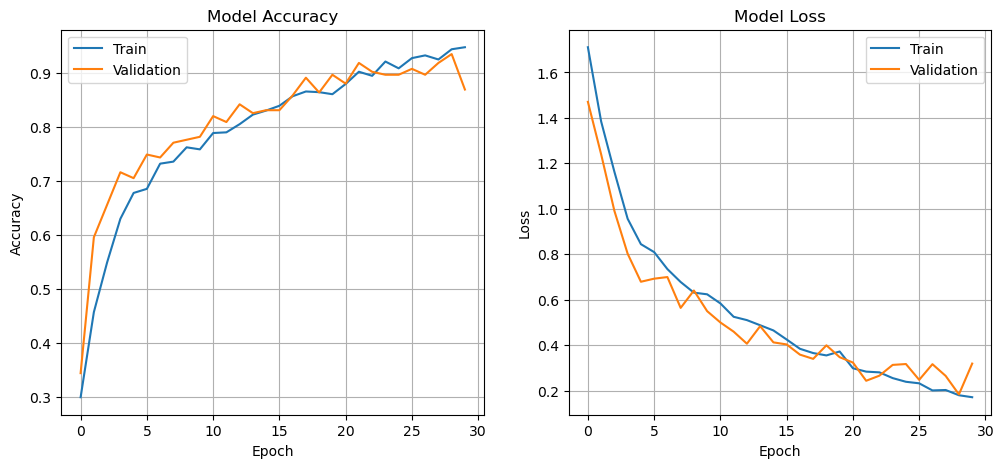

In [29]:
# Assuming you have the history object from model.fit()
history = model.fit(
    mfcc_train, lables_train,
    epochs=30,  
    batch_size=42,  
    validation_data=(mfcc_val, lables_val),
    verbose=1
)

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.grid()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.grid()

plt.show()



In [30]:
test_loss, test_accuracy = model.evaluate(mfcc_test, lables_test)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8954 - loss: 0.3700 
Test loss: 0.3651
Test accuracy: 0.8923


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Classification Report:
                precision    recall  f1-score   support

         COPD       0.86      1.00      0.92        18
Bronchiolitis       0.91      0.91      0.91        11
    Pneumonia       1.00      0.93      0.96        14
         URTI       0.73      0.89      0.80         9
      Healthy       1.00      0.69      0.82        13

     accuracy                           0.89        65
    macro avg       0.90      0.88      0.88        65
 weighted avg       0.91      0.89      0.89        65



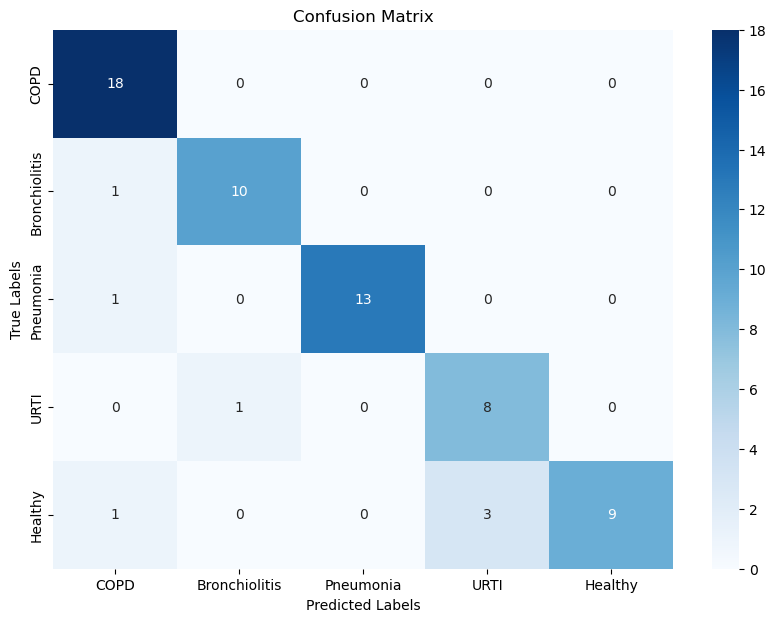

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get predictions
y_pred = model.predict(mfcc_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Convert y_test to class labels
y_test_classes = np.argmax(lables_test, axis=1)

# Compute classification report
report = classification_report(y_test_classes, y_pred_classes, target_names=['COPD', 'Bronchiolitis', 'Pneumonia', 'URTI', 'Healthy'])
print("Classification Report:\n", report)

# Compute confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes, labels=[0, 1, 2, 3, 4])

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['COPD', 'Bronchiolitis', 'Pneumonia', 'URTI', 'Healthy'], yticklabels=['COPD', 'Bronchiolitis', 'Pneumonia', 'URTI', 'Healthy'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [32]:
#Expanding dimensions to 3D array as LSTM accepts 3D
x_train_lstm = np.expand_dims(mfcc_train,axis=2)
x_val_lstm = np.expand_dims(mfcc_val,axis=2)
x_test_lstm = np.expand_dims(mfcc_test,axis=2)

In [33]:
from tensorflow.keras.layers import LSTM, BatchNormalization
# Initialize a Sequential model
lstm_model = Sequential()

#1st Convolutional Layer:Conv1D layer with 2048 filters, kernel size of 5, and 'same' padding to maintain the input shape.
#ReLU activation is used to introduce non-linearity.
#Input shape is specified as (52, 1), where 52 is the number of features from MFCC and 1 is the single channel.
lstm_model.add(Conv1D(2048, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(52, 1)))
#MaxPooling Layer:Reduces the dimensionality of the output from the Conv1D layer by taking the maximum value in each pool.
#Pool size of 2 reduces the feature map size by half, with 'same' padding to preserve spatial dimensions.
lstm_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
#Batch Normalization Layer:Normalizes the output of the previous layer to stabilize and speed up the training process.
lstm_model.add(BatchNormalization())


#2nd Convolutional Layer:Conv1D layer with 1024 filters, similar kernel size and padding.
#The input shape is not specified again because Keras automatically infers it from the previous layer.
lstm_model.add(Conv1D(1024, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(52, 1)))
#MaxPooling and Batch Normalization:Similar to the first set, these layers further downsample and normalize the feature maps.
lstm_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
lstm_model.add(BatchNormalization())


# 3rd Convolutional Layer:Conv1D layer with 512 filters, continuing to reduce the feature map size and learn more complex features.
lstm_model.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'))
#MaxPooling and Batch Normalization:these layers downsample and normalize.
lstm_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
lstm_model.add(BatchNormalization())

#1st LSTM Layer:LSTM layer with 256 units, set to return sequences (i.e. the entire output sequence is returned).
lstm_model.add(LSTM(256, return_sequences=True))
#2nd LSTM Layer:LSTM layer with 128 units. This layer returns only the last output in the output sequence.
lstm_model.add(LSTM(128))


#Fully Connected Layer:Dense layer with 64 units and ReLU activation.
#A Dropout layer with 0.5 dropout rate is added to prevent overfitting by randomly dropping out half of the neurons during training.
lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dropout(0.5))

#Another Fully Connected Layer:Dense layer with 32 units and ReLU activation, followed by another Dropout layer with 0.5 dropout rate.
lstm_model.add(Dense(32, activation='relu'))
lstm_model.add(Dropout(0.5))

#Output Layer:Final Dense layer with 5 units and softmax activation, corresponding to the 5 classes in the classification problem.
#The softmax activation outputs probabilities for each class.
lstm_model.add(Dense(5, activation='softmax'))

#Summarize the model architecture:
lstm_model.summary()

C:\Users\22rup\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)                    │ (None, 52, 2048)            │          12,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 26, 2048)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 2048)            │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 26, 1024)            │      10,486,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 13, 1024)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 13, 1024)            │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 13, 512)             │       2,621,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 7, 512)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 7, 512)              │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 7, 256)              │         787,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,130,437 (53.90 MB)

 Trainable params: 14,123,269 (53.88 MB)

 Non-trainable params: 7,168 (28.00 KB)

In [34]:
optimiser = tf.keras.optimizers.Adam(learning_rate = 0.0001)
lstm_model.compile(optimizer=optimiser,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

cb = [EarlyStopping(patience=20,monitor='val_accuracy',mode='max',restore_best_weights=True)]

In [35]:
history = lstm_model.fit(x_train_lstm, lables_train, batch_size=12, epochs=250, validation_data=(x_val_lstm, lables_val),callbacks = cb )

Epoch 1/250
67/67 ━━━━━━━━━━━━━━━━━━━━ 53s 691ms/step - accuracy: 0.3238 - loss: 1.5167 - val_accuracy: 0.3169 - val_loss: 1.5977
Epoch 2/250
67/67 ━━━━━━━━━━━━━━━━━━━━ 45s 675ms/step - accuracy: 0.3938 - loss: 1.3496 - val_accuracy: 0.4481 - val_loss: 1.4509
Epoch 3/250
67/67 ━━━━━━━━━━━━━━━━━━━━ 47s 692ms/step - accuracy: 0.4577 - loss: 1.2744 - val_accuracy: 0.5191 - val_loss: 1.3623
Epoch 4/250
67/67 ━━━━━━━━━━━━━━━━━━━━ 53s 800ms/step - accuracy: 0.4727 - loss: 1.2444 - val_accuracy: 0.4973 - val_loss: 1.2246
Epoch 5/250
67/67 ━━━━━━━━━━━━━━━━━━━━ 53s 798ms/step - accuracy: 0.5297 - loss: 1.1588 - val_accuracy: 0.5792 - val_loss: 1.1591
Epoch 6/250
67/67 ━━━━━━━━━━━━━━━━━━━━ 52s 777ms/step - accuracy: 0.5533 - loss: 1.0773 - val_accuracy: 0.6612 - val_loss: 1.0058
Epoch 7/250
67/67 ━━━━━━━━━━━━━━━━━━━━ 53s 790ms/step - accuracy: 0.5732 - loss: 1.0741 - val_accuracy: 0.6503 - val_loss: 0.9274
Epoch 8/250
67/67 ━━━━━━━━━━━━━━━━━━━━ 51s 762ms/step - accuracy: 0.6050 - loss: 0.9898 - 

67/67 ━━━━━━━━━━━━━━━━━━━━ 50s 746ms/step - accuracy: 0.9573 - loss: 0.1165 - val_accuracy: 0.9344 - val_loss: 0.2961
Epoch 100/250
67/67 ━━━━━━━━━━━━━━━━━━━━ 51s 764ms/step - accuracy: 0.9661 - loss: 0.1018 - val_accuracy: 0.8579 - val_loss: 0.6990
Epoch 101/250
67/67 ━━━━━━━━━━━━━━━━━━━━ 50s 745ms/step - accuracy: 0.9577 - loss: 0.1740 - val_accuracy: 0.9016 - val_loss: 0.3945
Epoch 102/250
67/67 ━━━━━━━━━━━━━━━━━━━━ 51s 753ms/step - accuracy: 0.9704 - loss: 0.1089 - val_accuracy: 0.9508 - val_loss: 0.2252
Epoch 103/250
67/67 ━━━━━━━━━━━━━━━━━━━━ 49s 727ms/step - accuracy: 0.9758 - loss: 0.0922 - val_accuracy: 0.9344 - val_loss: 0.3076
Epoch 104/250
67/67 ━━━━━━━━━━━━━━━━━━━━ 49s 735ms/step - accuracy: 0.9855 - loss: 0.0708 - val_accuracy: 0.9508 - val_loss: 0.3087
Epoch 105/250
67/67 ━━━━━━━━━━━━━━━━━━━━ 50s 753ms/step - accuracy: 0.9669 - loss: 0.1069 - val_accuracy: 0.9235 - val_loss: 0.4747
Epoch 106/250
67/67 ━━━━━━━━━━━━━━━━━━━━ 55s 829ms/step - accuracy: 0.9720 - loss: 0.0949 

In [41]:
test_loss, test_accuracy = lstm_model.evaluate(x_test_lstm, lables_test)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.9070 - loss: 0.3661
Test loss: 0.3568
Test accuracy: 0.9077


In [42]:
lstm_model.evaluate(x_val_lstm, lables_val)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 240ms/step - accuracy: 0.9697 - loss: 0.1676


[0.1691349595785141, 0.9672130942344666]

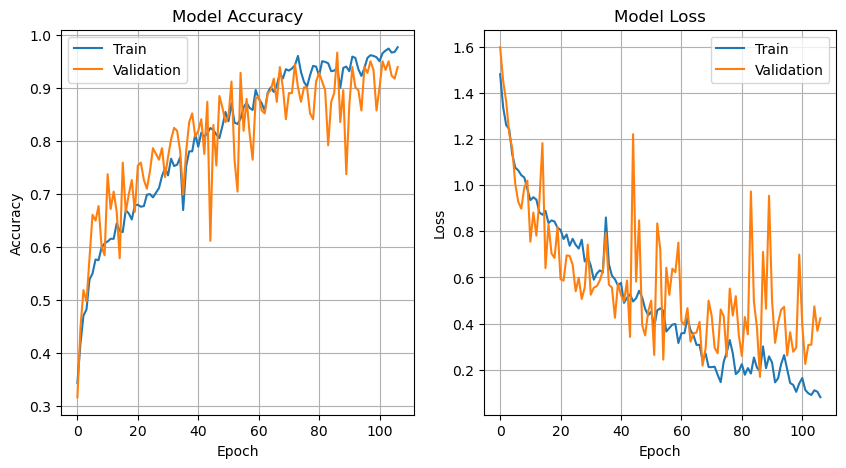

In [43]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.grid()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.grid()

plt.show()



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


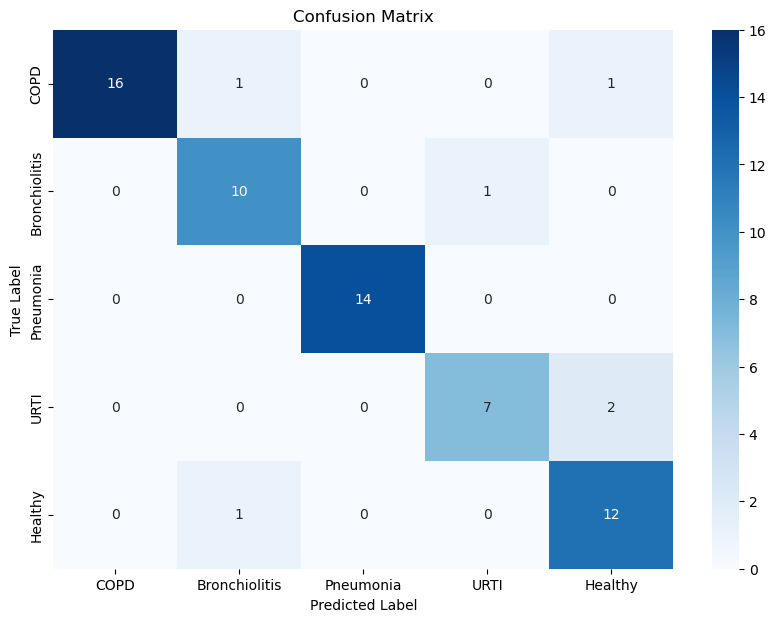

               precision    recall  f1-score   support

         COPD       1.00      0.89      0.94        18
Bronchiolitis       0.83      0.91      0.87        11
    Pneumonia       1.00      1.00      1.00        14
         URTI       0.88      0.78      0.82         9
      Healthy       0.80      0.92      0.86        13

     accuracy                           0.91        65
    macro avg       0.90      0.90      0.90        65
 weighted avg       0.91      0.91      0.91        65



In [44]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Predict the labels for your test data
y_predict = lstm_model.predict(x_test_lstm)

# Step 2: Convert predictions and true labels from one-hot encoding to class labels
y_predict_class = np.argmax(y_predict, axis=1)
y_true_class = np.argmax(lables_test, axis=1)

# Define the label names
label_names = ['COPD', 'Bronchiolitis', 'Pneumonia', 'URTI', 'Healthy']

# Step 3: Create the confusion matrix
cm = confusion_matrix(y_true_class, y_predict_class)

# Step 4: Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Step 5: Calculate precision, recall, and F1-score
report = classification_report(y_true_class, y_predict_class, target_names=label_names)
print(report)


In [45]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, BatchNormalization, Dropout, Input, Flatten, Layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras.backend as K

# Attention Mechanism
class CustomAttention(Layer):
    def __init__(self, **kwargs):
        super(CustomAttention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W_att = self.add_weight(name="att_weight", shape=(input_shape[-1], input_shape[-1]), initializer="glorot_uniform", trainable=True)
        self.b_att = self.add_weight(name="att_bias", shape=(input_shape[-1],), initializer="zeros", trainable=True)
        self.u_att = self.add_weight(name="att_u", shape=(input_shape[-1],), initializer="glorot_uniform", trainable=True)
        super(CustomAttention, self).build(input_shape)

    def call(self, inputs):
        # Apply a fully connected layer with tanh activation
        u_scores = K.tanh(K.dot(inputs, self.W_att) + self.b_att)
        
        # Calculate the attention scores
        att_scores = K.dot(u_scores, K.expand_dims(self.u_att, -1))
        att_scores = K.squeeze(att_scores, -1)  # Remove the last dimension
        att_scores = K.exp(att_scores)
        
        # Normalize the scores
        att_weights = att_scores / K.sum(att_scores, axis=1, keepdims=True) + K.epsilon()
        
        # Apply the attention scores to the context vector
        weighted_input = inputs * K.expand_dims(att_weights, -1)
        context_vector = K.sum(weighted_input, axis=1)
        
        return context_vector

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[-1])

# Define the model
custom_lstm_model = Sequential()

custom_lstm_model.add(Conv1D(2048, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(52, 1)))
custom_lstm_model.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))
custom_lstm_model.add(BatchNormalization())

custom_lstm_model.add(Conv1D(1024, kernel_size=5, strides=1, padding='same', activation='relu'))
custom_lstm_model.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))
custom_lstm_model.add(BatchNormalization())

custom_lstm_model.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'))
custom_lstm_model.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))
custom_lstm_model.add(BatchNormalization())

custom_lstm_model.add(LSTM(256, return_sequences=True))
custom_lstm_model.add(LSTM(128, return_sequences=True))

# Add Custom Attention layer
custom_lstm_model.add(CustomAttention())

custom_lstm_model.add(Dense(64, activation='relu'))
custom_lstm_model.add(Dropout(0.5))

custom_lstm_model.add(Dense(32, activation='relu'))
custom_lstm_model.add(Dropout(0.5))

custom_lstm_model.add(Dense(5, activation='softmax'))

custom_lstm_model.summary()

# Compile the model
opt = Adam(learning_rate=0.0001)
custom_lstm_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
callbacks_list = [EarlyStopping(patience=20, monitor='val_accuracy', mode='max', restore_best_weights=True)]

# Train the model
training_history = custom_lstm_model.fit(x_train_lstm, lables_train, batch_size=10, epochs=250, validation_data=(x_val_lstm, lables_val), callbacks=callbacks_list)


C:\Users\22rup\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_9 (Conv1D)                    │ (None, 52, 2048)            │          12,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_9 (MaxPooling1D)       │ (None, 26, 2048)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 26, 2048)            │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_10 (Conv1D)                   │ (None, 26, 1024)            │      10,486,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_10 (MaxPooling1D)      │ (None, 13, 1024)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 13, 1024)            │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_11 (Conv1D)                   │ (None, 13, 512)             │       2,621,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_11 (MaxPooling1D)      │ (None, 7, 512)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 7, 512)              │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 7, 256)              │         787,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 7, 128)              │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ custom_attention_1 (CustomAttention) │ (None, 128)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,147,077 (53.97 MB)

 Trainable params: 14,139,909 (53.94 MB)

 Non-trainable params: 7,168 (28.00 KB)

Epoch 1/250
80/80 ━━━━━━━━━━━━━━━━━━━━ 64s 687ms/step - accuracy: 0.2448 - loss: 1.5791 - val_accuracy: 0.2077 - val_loss: 1.5984
Epoch 2/250
80/80 ━━━━━━━━━━━━━━━━━━━━ 55s 685ms/step - accuracy: 0.3841 - loss: 1.4338 - val_accuracy: 0.3169 - val_loss: 1.4619
Epoch 3/250
80/80 ━━━━━━━━━━━━━━━━━━━━ 82s 683ms/step - accuracy: 0.4205 - loss: 1.3696 - val_accuracy: 0.4153 - val_loss: 1.3649
Epoch 4/250
80/80 ━━━━━━━━━━━━━━━━━━━━ 56s 697ms/step - accuracy: 0.4513 - loss: 1.3105 - val_accuracy: 0.5464 - val_loss: 1.2118
Epoch 5/250
80/80 ━━━━━━━━━━━━━━━━━━━━ 54s 681ms/step - accuracy: 0.4707 - loss: 1.2506 - val_accuracy: 0.6393 - val_loss: 1.1700
Epoch 6/250
80/80 ━━━━━━━━━━━━━━━━━━━━ 55s 689ms/step - accuracy: 0.5047 - loss: 1.2300 - val_accuracy: 0.5738 - val_loss: 1.0674
Epoch 7/250
80/80 ━━━━━━━━━━━━━━━━━━━━ 55s 686ms/step - accuracy: 0.4949 - loss: 1.2079 - val_accuracy: 0.4863 - val_loss: 1.1919
Epoch 8/250
80/80 ━━━━━━━━━━━━━━━━━━━━ 53s 667ms/step - accuracy: 0.5403 - loss: 1.1327 - 

In [46]:
test_loss, test_accuracy = custom_lstm_model.evaluate(x_test_lstm, lables_test)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 0.9186 - loss: 0.5103
Test loss: 0.4887
Test accuracy: 0.9231


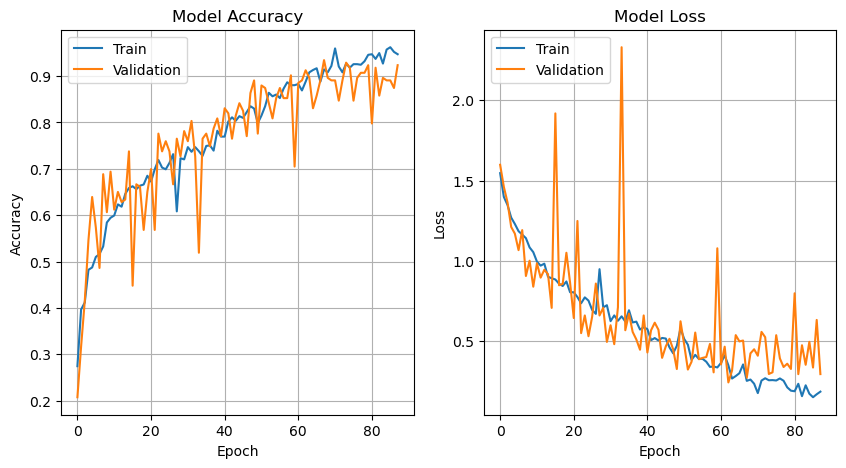

In [47]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)

plt.show()


2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000293BA36D5A0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 565ms/step


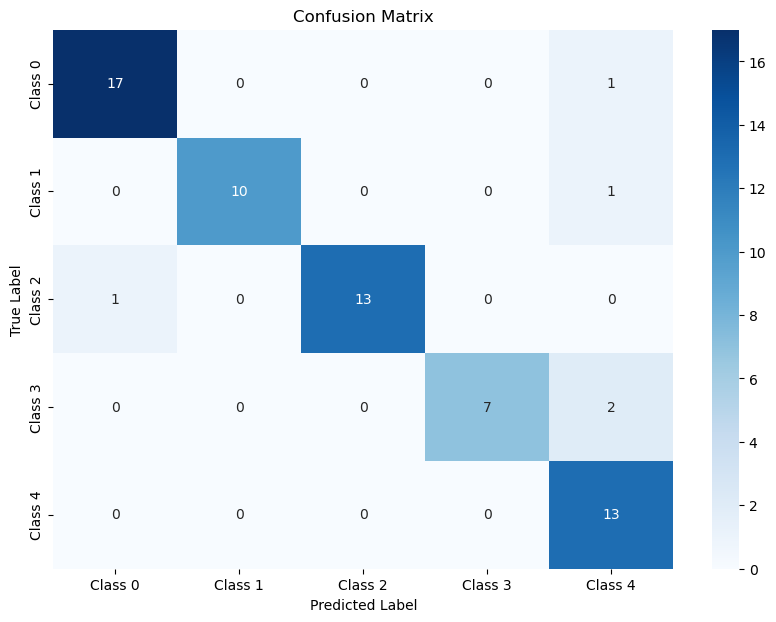

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.94      0.94      0.94        18
     Class 1       1.00      0.91      0.95        11
     Class 2       1.00      0.93      0.96        14
     Class 3       1.00      0.78      0.88         9
     Class 4       0.76      1.00      0.87        13

    accuracy                           0.92        65
   macro avg       0.94      0.91      0.92        65
weighted avg       0.94      0.92      0.92        65



In [48]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Step 1: Predict the labels for your test data
predictions = custom_lstm_model.predict(x_test_lstm)

# Step 2: Convert predictions and true labels from one-hot encoding to class labels
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(lables_test, axis=1)

# Step 3: Create the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Step 4: Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Step 5: Calculate precision, recall, and F1-score
classification_report_result = classification_report(true_classes, predicted_classes, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'])
print("Classification Report:\n", classification_report_result)


In [49]:
import numpy as np

# Assuming you have your test data in 'x_test_lstm'
# Get the probabilities for each class
probabilities = custom_lstm_model.predict(x_test_lstm)

# Assuming the class names are stored in this list (replace with your actual class names)
class_names = ['COPD', 'Bronchiolitis', 'Pneumonia', 'URTI', 'Healthy']

# Loop through each sample and identify the top two predictions
for i, prob in enumerate(probabilities):
    # Get the indices of the largest and second-largest probabilities
    top_two_indices = np.argsort(prob)[-2:][::-1]  # Sort and get the last two indices in descending order

    # Get the corresponding class names
    top_class = class_names[top_two_indices[0]]
    second_class = class_names[top_two_indices[1]]

    # Get the corresponding probabilities
    top_prob = prob[top_two_indices[0]]
    second_prob = prob[top_two_indices[1]]

    # Determine if the largest probability is exactly 1
    if top_prob == 1.0:
        # If the largest probability is 1, omit the second-largest class
        print(f"The prediction for the patient is '{top_class}' with a probability of {top_prob:.5f}.")
    else:
        # If the largest probability is less than 1 and the second-largest is 'Healthy'
        if second_class == 'Healthy':
            print(f"The prediction for the patient is '{top_class}' with a probability of {top_prob:.5f} but can also be termed as '{second_class}' with a probability of {second_prob:.5f}.")
        else:
            print(f"The prediction for the patient is '{top_class}' with a probability of {top_prob:.5f} but is at risk of '{second_class}' with a probability of {second_prob:.5f}.")


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 306ms/step
The prediction for the patient is 'Bronchiolitis' with a probability of 0.99990 but can also be termed as 'Healthy' with a probability of 0.00008.
The prediction for the patient is 'URTI' with a probability of 0.89990 but can also be termed as 'Healthy' with a probability of 0.08038.
The prediction for the patient is 'Healthy' with a probability of 0.92587 but is at risk of 'URTI' with a probability of 0.06113.
The prediction for the patient is 'COPD' with a probability of 1.00000.
The prediction for the patient is 'COPD' with a probability of 1.00000 but can also be termed as 'Healthy' with a probability of 0.00000.
The prediction for the patient is 'Pneumonia' with a probability of 0.99999 but is at risk of 'URTI' with a probability of 0.00001.
The prediction for the patient is 'Healthy' with a probability of 0.98583 but is at risk of 'URTI' with a probability of 0.01343.
The prediction for the patient is 'URTI' with a probability of 0.97730 but